---
title: "Resumen de las unidades educativas"
subtitle: "Examen de Analisis de Datos"
abstract: "Breve resumen de las proyecciones de la cantidad de unidades educativas y estudiantes para el año 2024 en base a datos del año 2020."
keypoints:
  - You may specify 1 to 3 keypoints for this PDF template
  - These keypoints are complete sentences and less than or equal to 140 characters
  - 'They are specific to this PDF template, so they will not appear in other exports'
keywords:
  - Unidades Educativas
  - Crecimiento
author:
  - name: "Andres Humberto Chirinos Lizondo"
    affiliation: "Carrera de Estadística - UMSA"
    email: ahchirinos@umsa.bo
    role: Visualization
    orcid: 0009-0004-1628-6135
    corresponding: true
date: "2024-10-17"
bibliography: assets/references.bib
license: CC BY-SA 4.0

echo: false
draft: false
citation: true
lang: es
---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from IPython.display import display

In [3]:
df = pd.read_csv("assets\data\database.csv", sep=";")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Andres\AppData\Local\Temp\ipykernel_14324\2335536773.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("assets\data\database.csv", sep=";")


In [4]:
#| output: false
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15615 entries, 0 to 15614
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_0        15615 non-null  int64  
 1   fid_unidad  15615 non-null  int64  
 2   cod_le      15615 non-null  int64  
 3   cod_ue_det  15615 non-null  object 
 4   des_ue_det  15615 non-null  object 
 5   cod_dep     15615 non-null  int64  
 6   nom_dep     15615 non-null  object 
 7   cod_prov    15615 non-null  int64  
 8   nom_prov    15615 non-null  object 
 9   cod_mun     15615 non-null  int64  
 10  nom_mun     15615 non-null  object 
 11  cod_mod_ap  15615 non-null  int64  
 12  modalidad   15615 non-null  object 
 13  cod_le_12   15615 non-null  int64  
 14  cod_ue      15615 non-null  int64  
 15  des_ue      15615 non-null  object 
 16  area        15615 non-null  object 
 17  cod_depn    15615 non-null  int64  
 18  cant_2020   15615 non-null  int64  
 19  crec_anual  15615 non-nul

In [5]:
df["c_ut"] = df["cod_dep"].apply(lambda x: f"{x:02}") + df["cod_prov"].apply(lambda x: f"{x:02}") + df["cod_mun"].apply(lambda x: f"{x:02}")

# 1. Cantidad proyectada para 2024 en base a la poblacion de 2020 y su taza de crecimiento

$$
c_{2024} = c_{2020} + 4(a)
$$

Donde. 

- $c_{2024}$ es la cantidad de estudiantes para 2024

- $c_{2020}$ es la cantidad de estudiantes para 2020

- $a$ es el crecimiento anual de estudiantes

In [6]:
df["cant_2024"] = df["cant_2020"] + 4*df["crec_anual"]

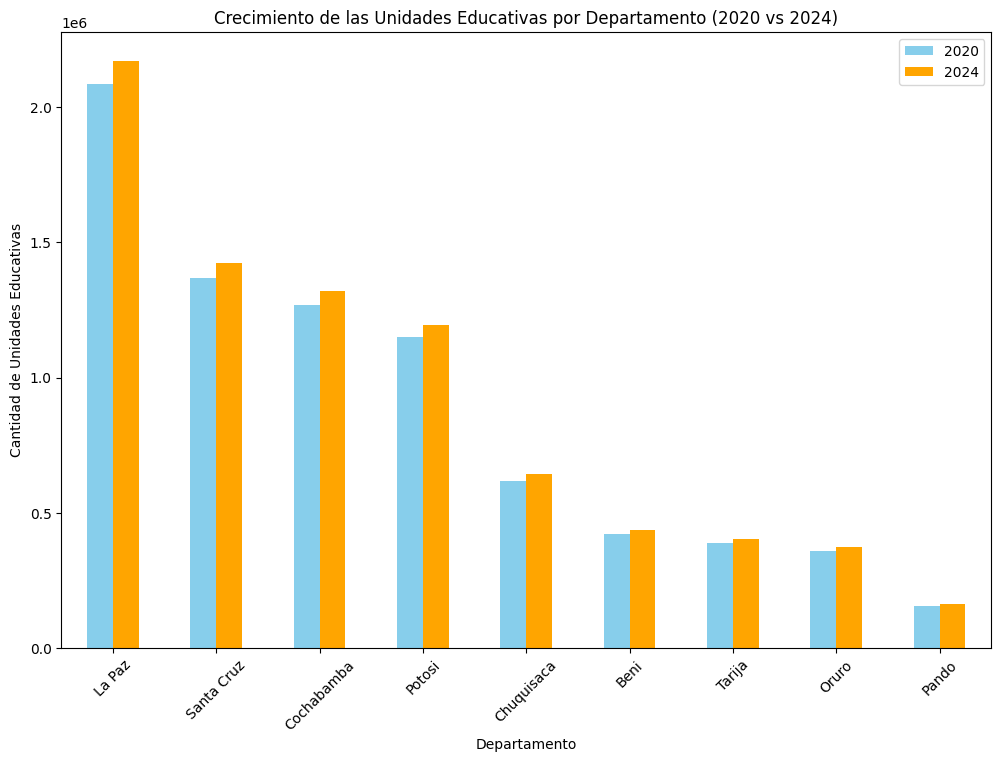

In [7]:
#| label: fig-crec2024
#| fig-cap: Crecimiento de las Unidades Educativas por Departamento (2020 vs 2024)
#| fig-alt: Demuestra las expectativas de crecimiento de los estudiantes de por departamento

df_growth = df.groupby("nom_dep")[["cant_2020", "cant_2024"]].sum()
df_growth = df_growth.sort_values(by="cant_2024", ascending=False)

df_growth.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'orange'])
plt.title('Crecimiento de las Unidades Educativas por Departamento (2020 vs 2024)')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Unidades Educativas')
plt.xticks(rotation=45)
plt.legend(["2020", "2024"])
plt.show()

# 2. Cantidad de Unidades Educativas por departamento

In [8]:
#| output: false
df_grouped = df.groupby("nom_dep")['fid_unidad'].count()
df_grouped = df_grouped.sort_values(ascending=False)
df_grouped

nom_dep
La Paz        4176
Santa Cruz    2734
Cochabamba    2527
Potosi        2297
Chuquisaca    1233
Beni           852
Tarija         768
Oruro          707
Pando          321
Name: fid_unidad, dtype: int64

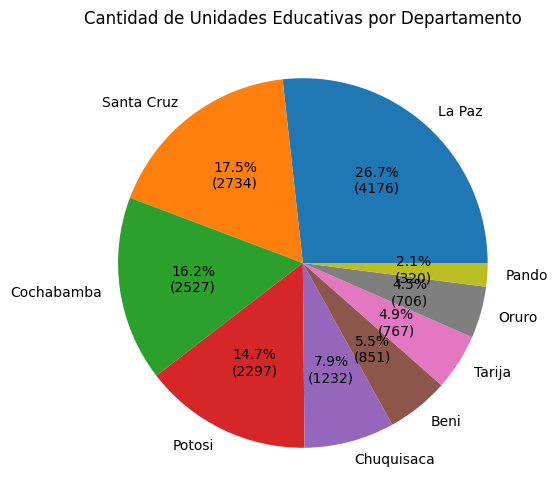

In [9]:
#| label: fig-rept2024
#| fig-cap: Conteo de unidades educativas por departamento
#| fig-alt: Demuestra el conteo de unidades educativas por departamento y cuanto representa en el total

plt.figure(figsize=(10, 6))

def func(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

df_grouped.plot(kind='pie', autopct=lambda pct: func(pct, df_grouped.values))
plt.title('Cantidad de Unidades Educativas por Departamento')
plt.ylabel('')  # Ocultar la etiqueta del eje y
plt.show()

# 3. Resumen de cantidad de Unidades Educativas por Departamento, Provincia y Municipio desagregado

In [10]:
# Agrupar por el número de colegios y sumar la cantidad de estudiantes
df_colegios_estudiantes = df.groupby('c_ut')['cant_2024'].sum().reset_index()
df_colegios = df.groupby('c_ut')['fid_unidad'].count().reset_index()

# Unir ambos DataFrames en uno solo
df_colegios_estudiantes = df_colegios_estudiantes.rename(columns={'cant_2024': 'Cantidad de Estudiantes'})
df_colegios = df_colegios.rename(columns={'fid_unidad': 'Cantidad de Colegios'})
df_combined = pd.merge(df_colegios_estudiantes, df_colegios, on='c_ut')
df_combined["ratio"]=df_combined["Cantidad de Estudiantes"]/df_combined["Cantidad de Colegios"]
display(df_combined)
print(df_combined["ratio"].mean())
print(df_combined["ratio"].std())

,c_ut,Cantidad de Estudiantes,Cantidad de Colegios,ratio
0,010101,102215,195,524.179487
1,010102,15093,31,486.870968
2,010103,27007,50,540.140000
3,010201,22438,38,590.473684
4,010202,25621,44,582.295455
...,...,...,...,...
330,090401,4811,9,534.555556
331,090402,3586,8,448.250000
332,090501,3017,6,502.833333
333,090502,6835,17,402.058824


520.9182046132242
70.60677697466468


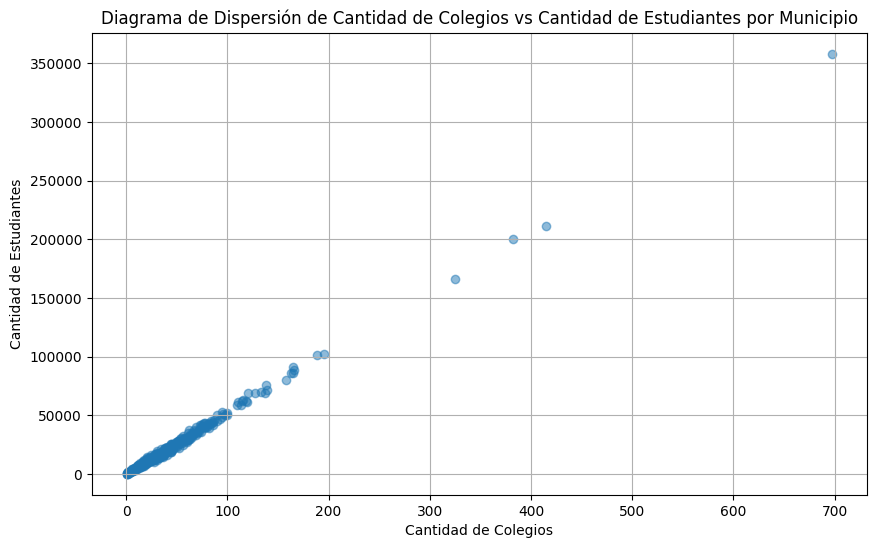

In [11]:
# Crear un diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['Cantidad de Colegios'], df_combined['Cantidad de Estudiantes'], alpha=0.5)
plt.title('Diagrama de Dispersión de Cantidad de Colegios vs Cantidad de Estudiantes por Municipio')
plt.xlabel('Cantidad de Colegios')
plt.ylabel('Cantidad de Estudiantes')
plt.grid(True)
plt.show()

In [12]:
# Calcular el índice de correlación
correlation = df_combined['Cantidad de Colegios'].corr(df_combined['Cantidad de Estudiantes'])
print(f"Índice de correlación: {correlation}")

# Calcular el promedio de estudiantes por unidad educativa
mean_students = df_combined['Cantidad de Estudiantes'].mean()
print(f"Promedio de estudiantes por unidad educativa: {mean_students}")

# Calcular la varianza de estudiantes por unidad educativa
variance_students = df_combined['Cantidad de Estudiantes'].var()
print(f"Varianza de estudiantes por unidad educativa: {variance_students}")

Índice de correlación: 0.9982796142756408
Promedio de estudiantes por unidad educativa: 24253.758208955223
Varianza de estudiantes por unidad educativa: 929233318.686871


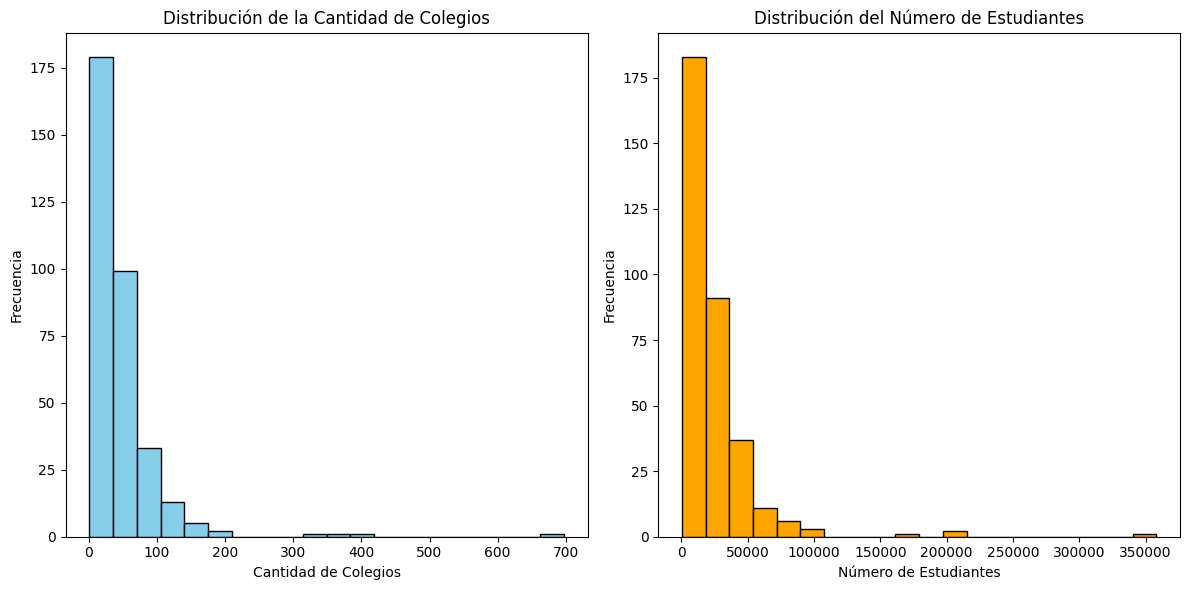

In [13]:
plt.figure(figsize=(12, 6))

# Histograma de la cantidad de colegios
plt.subplot(1, 2, 1)
plt.hist(df_combined['Cantidad de Colegios'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la Cantidad de Colegios')
plt.xlabel('Cantidad de Colegios')
plt.ylabel('Frecuencia')

# Histograma del número de estudiantes
plt.subplot(1, 2, 2)
plt.hist(df_combined['Cantidad de Estudiantes'], bins=20, color='orange', edgecolor='black')
plt.title('Distribución del Número de Estudiantes')
plt.xlabel('Número de Estudiantes')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Andres\AppData\Local\Temp\ipykernel_14324\3621801442.py:4: SyntaxWarning: invalid escape sequence '\d'
  bolivia_map = gpd.read_file("assets\data\municipios339.shp")


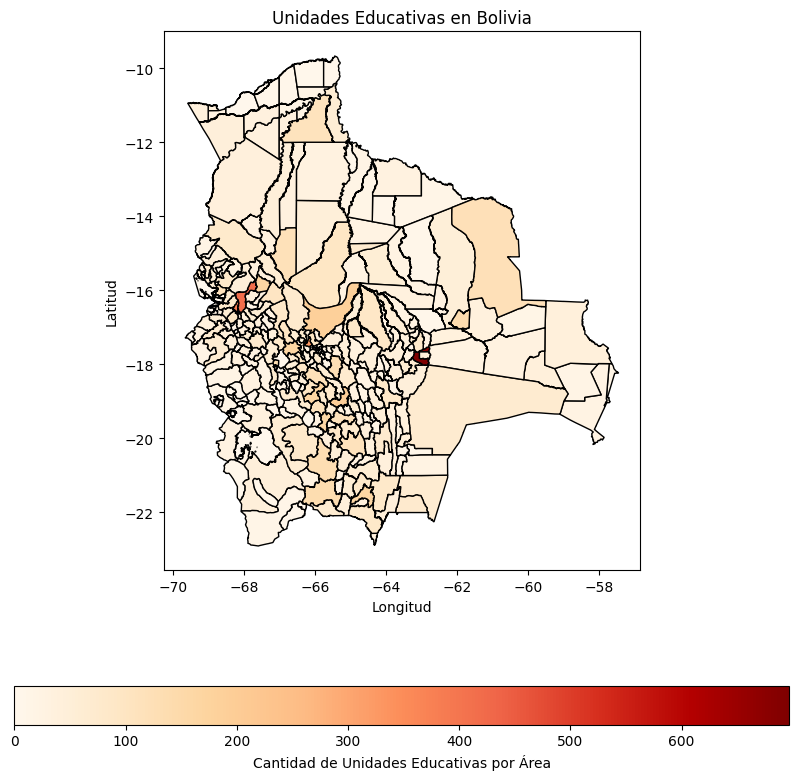

In [14]:
#| label: fig-mun2024
#| fig-cap: Conteo de unidades educativas por municipio
#| fig-alt: Demuestra el conteo de unidades educativas por departamento y cuanto representa en el total
bolivia_map = gpd.read_file("assets\data\municipios339.shp")

df_grouped = df.groupby(["c_ut"])['fid_unidad'].count()
df_grouped = df_grouped.sort_values(ascending=False)
df_grouped_df = df_grouped.reset_index()
df_grouped_df.columns = ['c_ut', 'Cantidad de Unidades Educativas']

bolivia_map = bolivia_map.merge(df_grouped_df, left_on='c_ut', right_on='c_ut', how='left')

bolivia_map['Cantidad de Unidades Educativas'] = bolivia_map['Cantidad de Unidades Educativas'].fillna(0)

fig, ax = plt.subplots(figsize=(10, 10))
bolivia_map.plot(column='Cantidad de Unidades Educativas', ax=ax, legend=True, 
                 legend_kwds={'label': "Cantidad de Unidades Educativas por Área",
                              'orientation': "horizontal"},
                 cmap='OrRd', edgecolor='black')

plt.title('Unidades Educativas en Bolivia')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Andres\AppData\Local\Temp\ipykernel_14324\666987258.py:3: SyntaxWarning: invalid escape sequence '\d'
  bolivia_map = gpd.read_file("assets\data\municipios339.shp")


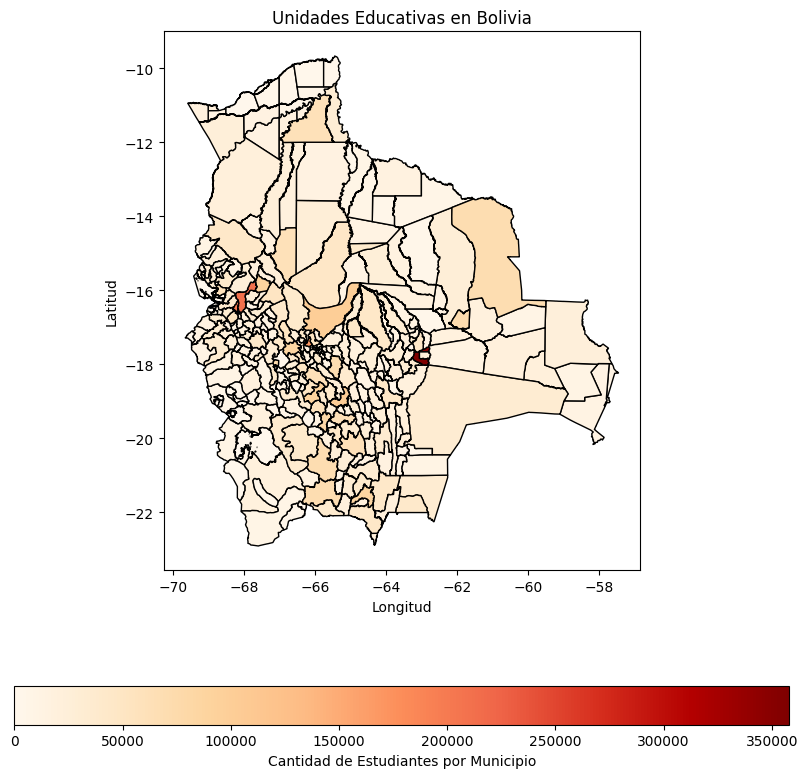

In [15]:
#| label: fig-mun2024cant
#| fig-cap: Conteo de estudiantes por municipio
bolivia_map = gpd.read_file("assets\data\municipios339.shp")

df_grouped = df.groupby(["c_ut"])['cant_2024'].sum()
df_grouped = df_grouped.sort_values(ascending=False)
df_grouped_df = df_grouped.reset_index()
df_grouped_df.columns = ['c_ut', 'Cantidad de Estudiantes']

bolivia_map = bolivia_map.merge(df_grouped_df, left_on='c_ut', right_on='c_ut', how='left')

bolivia_map['Cantidad de Estudiantes'] = bolivia_map['Cantidad de Estudiantes'].fillna(0)

fig, ax = plt.subplots(figsize=(10, 10))
bolivia_map.plot(column='Cantidad de Estudiantes', ax=ax, legend=True, 
                 legend_kwds={'label': "Cantidad de Estudiantes por Municipio",
                              'orientation': "horizontal"},
                 cmap='OrRd', edgecolor='black')

plt.title('Unidades Educativas en Bolivia')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

## 3.2. Ordenado por tamaño

In [16]:
#| label: tbl-depprovmun
#| tbl-cap: Cantidad de Unidades Educativas por Departamento, Provincia y Municipio desagregado, ordenado por cantidad

df_grouped = df.groupby(["nom_dep", "nom_prov", "nom_mun","c_ut"])['fid_unidad'].count()
df_grouped = df_grouped.sort_values(ascending=False)
df_grouped_df = df_grouped.reset_index()
df_grouped_df.columns = ['Departamento', 'Provincia','Municipio','CodigoINE','Cantidad de Unidades Educativas']
display(df_grouped_df)

,Departamento,Provincia,Municipio,CodigoINE,Cantidad de Unidades Educativas
0,Santa Cruz,Andres Iba?ez,Santa Cruz de la Sierra,070101,697
1,La Paz,Murillo,Nuestra Senora de La Paz,020101,415
2,La Paz,Murillo,El Alto,020105,382
3,Cochabamba,Cercado,Cochabamba,030101,325
4,Chuquisaca,Oropeza,Sucre,010101,195
...,...,...,...,...,...
333,Oruro,Litoral,Escara,040502,1
334,Oruro,Mejillones,Carangas,041503,1
335,Oruro,Litoral,Yunguyo del Litoral,040504,1
336,Oruro,Mejillones,La Rivera,041501,1


## 3.1. Ordenado por Departamento, Provincia y Municipio

In [17]:
#| label: tbl-depprovmun2
#| tbl-cap: Cantidad de Unidades Educativas por Departamento, Provincia y Municipio desagregado, ordenado por Ubicación

df_grouped = df.groupby(["nom_dep", "nom_prov", "nom_mun","c_ut"])['fid_unidad'].count()
df_grouped = df_grouped.sort_index(ascending=True)
df_grouped_df = df_grouped.reset_index()
df_grouped_df.columns = ['Departamento', 'Provincia','Municipio','CodigoINE','Cantidad de Unidades Educativas']
display(df_grouped_df)

,Departamento,Provincia,Municipio,CodigoINE,Cantidad de Unidades Educativas
0,Beni,Cercado,San Javier,080102,24
1,Beni,Cercado,Trinidad,080101,75
2,Beni,General Jose Balliv,Reyes,080301,49
3,Beni,General Jose Balliv,Rurrenabaque,080304,36
4,Beni,General Jose Balliv,San Borja,080302,119
...,...,...,...,...,...
333,Tarija,Gran Chaco,Carapari,060302,46
334,Tarija,Gran Chaco,Villamontes,060303,63
335,Tarija,Gran Chaco,Yacuiba,060301,74
336,Tarija,Mendez,Tomayapo (El Puente),060502,57


In [18]:
df_grouped.to_csv("assets\data\cantidad_unidades.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Andres\AppData\Local\Temp\ipykernel_14324\936831085.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_grouped.to_csv("assets\data\cantidad_unidades.csv")


# 4. Resumen de las Unidades Educativas por Departamento, que tengan 991 y 1000 estudiantes.

In [19]:
df_dep = df[(df['cant_2024'] >= 991) & (df['cant_2024'] <= 1000)]
df_grouped = df_dep.groupby("nom_dep")['fid_unidad'].count()
df_grouped = df_grouped.sort_values(ascending=False)
df_grouped_df = df_grouped.reset_index()
df_grouped_df.columns = ['Departamento', 'Cantidad de Unidades Educativas']
display(df_grouped_df)

,Departamento,Cantidad de Unidades Educativas
0,La Paz,44
1,Potosi,27
2,Cochabamba,27
3,Santa Cruz,22
4,Chuquisaca,14
5,Beni,5
6,Tarija,5
7,Oruro,3
8,Pando,2


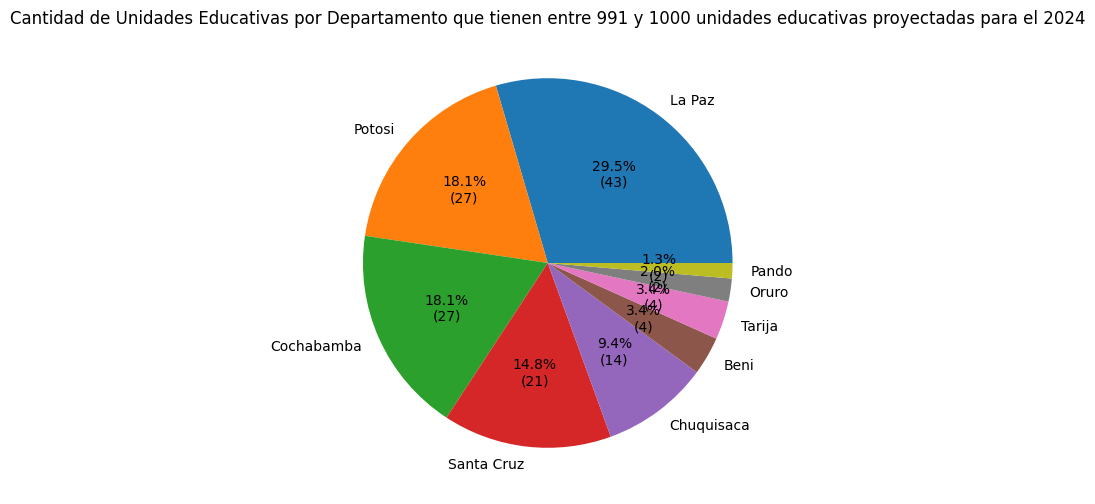

In [20]:
plt.figure(figsize=(10, 6))

def func(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

df_grouped.plot(kind='pie', autopct=lambda pct: func(pct, df_grouped.values))
plt.title('Cantidad de Unidades Educativas por Departamento que tienen entre 991 y 1000 unidades educativas proyectadas para el 2024')
plt.ylabel('')  # Ocultar la etiqueta del eje y
plt.show()

## 4.1. Comparativa de Tamaño de grupo con respecto al resto

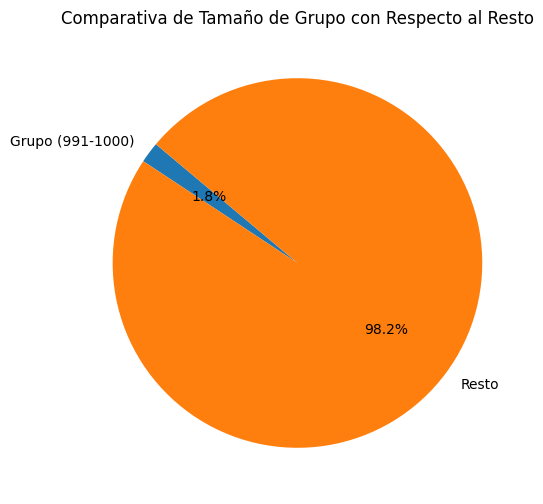

In [21]:
total_unidades = df['cant_2024'].sum()
total_grupo = df_dep['cant_2024'].sum()
resto = total_unidades - total_grupo

sizes = [total_grupo, resto]
labels = ['Grupo (991-1000)', 'Resto']

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Comparativa de Tamaño de Grupo con Respecto al Resto')
plt.show()

## 4.2 Segmentación por modalidad

In [22]:
df_modalidad = df_dep.groupby("modalidad")['fid_unidad'].count()
df_modalidad = df_modalidad.sort_values(ascending=False)
df_grouped_df = df_modalidad.reset_index()
df_grouped_df.columns = ['Modalidad','Cantidad de Unidades Educativas']
display(df_grouped_df)

,Modalidad,Cantidad de Unidades Educativas
0,Regular,144
1,Alternativa,4
2,Especial,1


## 4.3 Segmentación por area

In [23]:
df_area = df_dep.groupby("area")['fid_unidad'].count()
df_area = df_area.sort_values(ascending=False)
df_grouped_df = df_area.reset_index()
df_grouped_df.columns = ['Area','Cantidad de Unidades Educativas']
display(df_grouped_df)

,Area,Cantidad de Unidades Educativas
0,R,121
1,U,28


# 5. Resumen de Area de las unidades educativas

In [24]:
df_area = df.groupby("area")['fid_unidad'].count()
df_area = df_area.sort_values(ascending=False)
df_area

area
R    12132
U     3483
Name: fid_unidad, dtype: int64

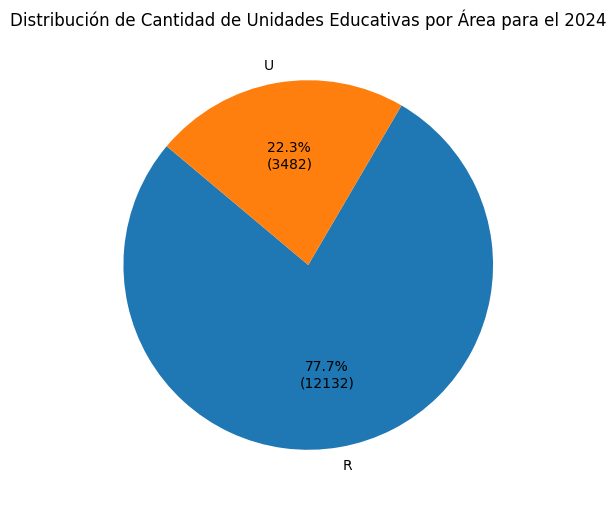

In [25]:
plt.figure(figsize=(10, 6))

def func(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

labels = df_area.index.tolist()  # Asegúrate de que las etiquetas coincidan con la longitud de df_area
sizes = df_area.values  # Asegúrate de que los tamaños coincidan con los valores de df_area

plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=140)
plt.title('Distribución de Cantidad de Unidades Educativas por Área para el 2024')
plt.show()

In [26]:
df_area = df.groupby("area")['cant_2024'].sum()
df_area = df_area.sort_values(ascending=False)
df_area

area
R    6306290
U    1818719
Name: cant_2024, dtype: int64

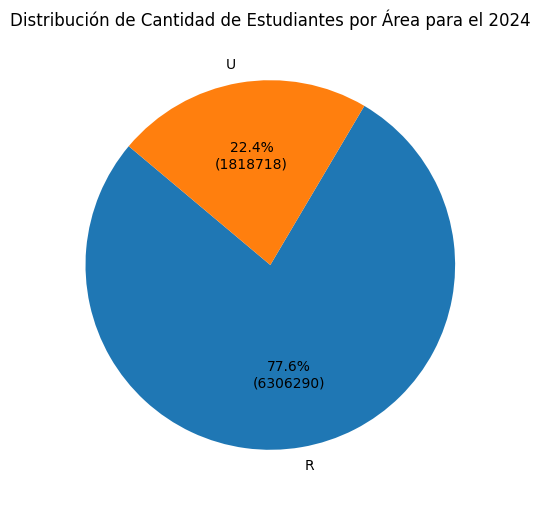

In [27]:
plt.figure(figsize=(10, 6))

def func(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

labels = df_area.index.tolist()  # Asegúrate de que las etiquetas coincidan con la longitud de df_area
sizes = df_area.values  # Asegúrate de que los tamaños coincidan con los valores de df_area

plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=140)
plt.title('Distribución de Cantidad de Estudiantes por Área para el 2024')
plt.show()

# 6. Resumen de Modalidad de las Unidades educativas

In [28]:
df_modalidad = df.groupby("modalidad")['fid_unidad'].count()
df_modalidad = df_modalidad.sort_values(ascending=False)
df_modalidad

modalidad
Regular        15081
Alternativa      506
Especial          28
Name: fid_unidad, dtype: int64

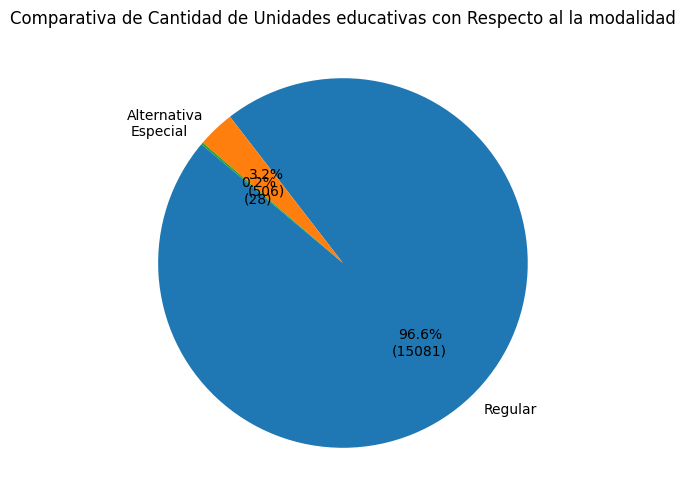

In [29]:
plt.figure(figsize=(10, 6))

def func(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

labels = df_modalidad.index.tolist()  # Ensure labels match the length of df_modalidad
sizes = df_modalidad.values  # Ensure sizes match the values of df_modalidad

plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=140)
plt.title('Comparativa de Cantidad de Unidades educativas con Respecto al la modalidad')
plt.show()

In [30]:
df_modalidad = df.groupby("modalidad")['cant_2024'].sum()
df_modalidad = df_modalidad.sort_values(ascending=False)
df_modalidad

modalidad
Regular        7846094
Alternativa     265647
Especial         13268
Name: cant_2024, dtype: int64

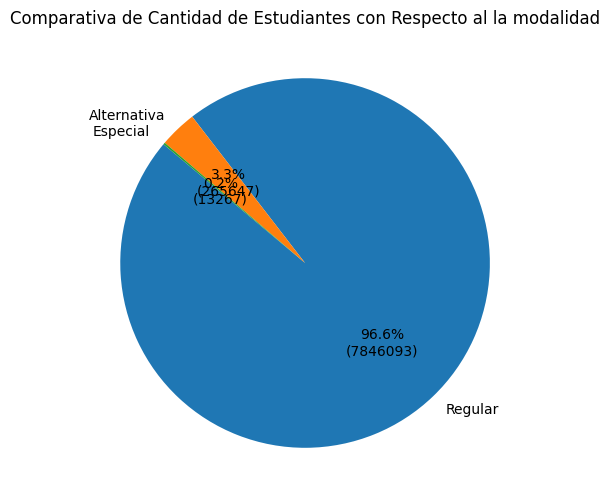

In [31]:
plt.figure(figsize=(10, 6))

def func(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

labels = df_modalidad.index.tolist()  # Ensure labels match the length of df_modalidad
sizes = df_modalidad.values  # Ensure sizes match the values of df_modalidad

plt.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=140)
plt.title('Comparativa de Cantidad de Estudiantes con Respecto al la modalidad')
plt.show()

# 7. Resumen de cruce de variables

In [32]:
df_modalidad_area_count = df.groupby(["modalidad", "area"])['fid_unidad'].count()
df_modalidad_area_count = df_modalidad_area_count.sort_values(ascending=False)
print("Conteo de unidades por modalidad y área:")
print(df_modalidad_area_count)

Conteo de unidades por modalidad y área:
modalidad    area
Regular      R       11923
             U        3158
Alternativa  U         310
             R         196
Especial     U          15
             R          13
Name: fid_unidad, dtype: int64


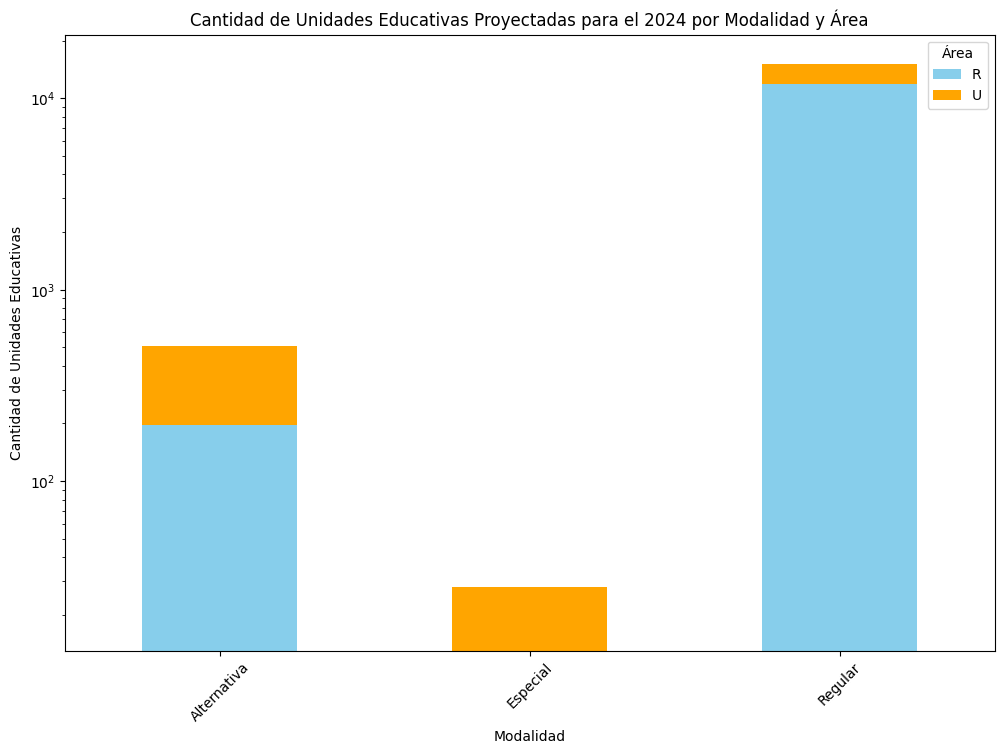

In [33]:
df_modalidad_area_count.unstack().plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'orange'])
plt.yscale('log')
plt.title('Cantidad de Unidades Educativas Proyectadas para el 2024 por Modalidad y Área')
plt.xlabel('Modalidad')
plt.ylabel('Cantidad de Unidades Educativas')
plt.xticks(rotation=45)
plt.legend(title='Área')
plt.show()

In [34]:
df_modalidad_area_sum = df.groupby(["modalidad", "area"])['cant_2024'].sum()
df_modalidad_area_sum = df_modalidad_area_sum.sort_values(ascending=False)
print("\nSuma de cantidad de estudiantes por modalidad y área:")
print(df_modalidad_area_sum)


Suma de cantidad de estudiantes por modalidad y área:
modalidad    area
Regular      R       6200152
             U       1645942
Alternativa  U        164986
             R        100661
Especial     U          7791
             R          5477
Name: cant_2024, dtype: int64


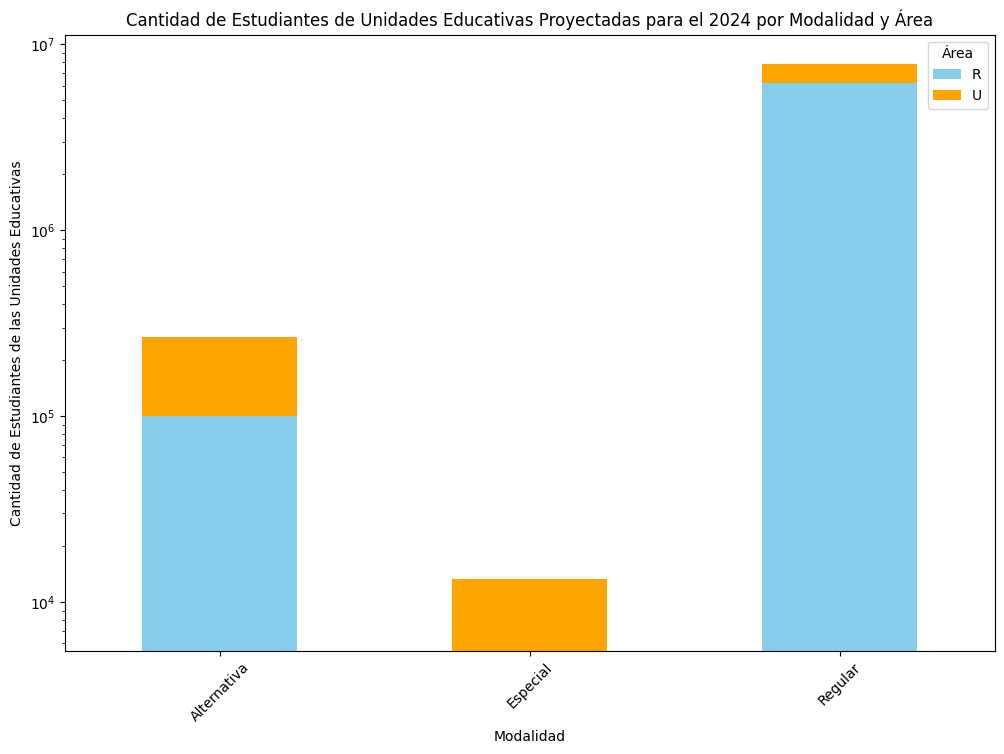

In [35]:
df_modalidad_area_sum.unstack().plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'orange'])
plt.yscale('log')
plt.title('Cantidad de Estudiantes de Unidades Educativas Proyectadas para el 2024 por Modalidad y Área')
plt.xlabel('Modalidad')
plt.ylabel('Cantidad de Estudiantes de las Unidades Educativas')
plt.xticks(rotation=45)
plt.legend(title='Área')
plt.show()

> *Notese que esta en escala logaritmica

## Referencias {.unnumbered}

:::{#refs}

:::

In [36]:
#| output: false
df

,id_0,fid_unidad,cod_le,cod_ue_det,des_ue_det,cod_dep,nom_dep,cod_prov,nom_prov,cod_mun,...,modalidad,cod_le_12,cod_ue,des_ue,area,cod_depn,cant_2020,crec_anual,cant_2024,c_ut
0,1,6317,71720016,71720022,NARANJITOS,6,Tarija,2,Arce,2,...,Regular,71720016,71720022,NARANJITOS,R,1,850,7,878,060202
1,2,6316,71720015,71720021,CAMPO GRANDE,6,Tarija,2,Arce,2,...,Regular,71720015,71720021,CAMPO GRANDE,R,1,766,4,782,060202
2,3,6318,71720017,71720023,PORCELANA,6,Tarija,2,Arce,2,...,Regular,71720017,71720023,PORCELANA,R,1,11,1,15,060202
3,4,6306,71720004,71720010,8 DE SEPTIEMBRE,6,Tarija,2,Arce,2,...,Regular,71720004,71720010,8 DE SEPTIEMBRE,U,2,805,8,837,060202
4,5,6328,71720030,71720005,GUIDO VILLAGOMEZ,6,Tarija,2,Arce,2,...,Regular,71720030,71720005,GUIDO VILLAGOMEZ,U,1,389,9,425,060202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15610,15611,3629,62440023,62440023,1 DE ABRIL,9,Pando,5,Federico Roman,3,...,Regular,62440023,62440023,1 DE ABRIL,R,1,10,0,10,090503
15611,15612,15511,82440022,82440003,MONTE SINAI,9,Pando,5,Federico Roman,1,...,Regular,82440022,82440003,MONTE SINAI,R,1,958,1,962,090501
15612,15613,15514,82440025,82440006,BRUNO RACUA,9,Pando,5,Federico Roman,1,...,Regular,82440025,82440006,BRUNO RACUA,R,1,144,9,180,090501
15613,15614,15509,82440017,82440001,MANUEL ESTREMADOIRO MARTINEZ,9,Pando,5,Federico Roman,1,...,Regular,82440017,82440001,MANUEL ESTREMADOIRO MARTINEZ,R,1,903,5,923,090501
